In [1]:
import sys
sys.executable

'C:\\Users\\SEAN\\anaconda3\\envs\\Carbon_Cloud\\python.exe'

In [2]:
# Importing required libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
# Creating a dataframe
transport_df = pd.read_csv("Model_CV_Grouped_Data_Test.csv")
transport_df.tail()

make model   vehicle_class  engine_size  cylinders transmission  \
7380  VOLVO  XC40     SUV - SMALL          2.0          4          AS8   
7381  VOLVO  XC60     SUV - SMALL          2.0          4          AS8   
7382  VOLVO  XC60     SUV - SMALL          2.0          4          AS8   
7383  VOLVO  XC90  SUV - STANDARD          2.0          4          AS8   
7384  VOLVO  XC90  SUV - STANDARD          2.0          4          AS8   

     fuel_type  fuel_consumption_city  fuel_consumption_hwy  \
7380         Z                   10.7                   7.7   
7381         Z                   11.2                   8.3   
7382         Z                   11.7                   8.6   
7383         Z                   11.2                   8.3   
7384         Z                   12.2                   8.7   

      fuel_consumption_comb  fuel_consumption_comb_mpg  co2_emissions  
7380                    9.4                         30            219  
7381                    9.9                         29            232  
7382                   10.3                         27            240  
7383                    9.9                         29            232  
7384                   10.7                         26            248

In [4]:
#Information about the Dataframe
transport_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   make                       7385 non-null   object 
 1   model                      7385 non-null   object 
 2   vehicle_class              7385 non-null   object 
 3   engine_size                7385 non-null   float64
 4   cylinders                  7385 non-null   int64  
 5   transmission               7385 non-null   object 
 6   fuel_type                  7385 non-null   object 
 7   fuel_consumption_city      7385 non-null   float64
 8   fuel_consumption_hwy       7385 non-null   float64
 9   fuel_consumption_comb      7385 non-null   float64
 10  fuel_consumption_comb_mpg  7385 non-null   int64  
 11  co2_emissions              7385 non-null   int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 692.5+ KB


In [5]:
# Qualitative / Categorical Variables :- make, model, vehicle_class, transmission, fuel_type
transport_df_qualitative = transport_df.drop(['engine_size','cylinders', 'fuel_consumption_city', 'fuel_consumption_hwy', 'fuel_consumption_comb_mpg', 'fuel_consumption_comb', 'co2_emissions'], axis=1)

# Quantitative Variables              :- engine_size, cylinders, fuel_consumption_city_(L/100 km), fuel_consumption_hwy_(L/100 km), fuel_consumption_comb_(L/100 km), fuel_consumption_comb_(mpg), co2_emissions(g/km)
transport_df_quantitative = transport_df.drop(['make','model', 'vehicle_class', 'transmission', 'fuel_type'], axis=1)

In [6]:
# Visualizing unique_categories_count & Observations/sample_count for each categories related to all Qualitative Variables
for i in transport_df_qualitative.columns:
    category_count = transport_df[i].value_counts()
    print(category_count)
    print("Unique categories count for", i ,":",transport_df[i].nunique())
    print()

make
FORD             628
CHEVROLET        588
BMW              527
MERCEDES-BENZ    419
PORSCHE          376
TOYOTA           330
GMC              328
AUDI             286
NISSAN           259
JEEP             251
DODGE            246
KIA              231
HONDA            214
HYUNDAI          210
MINI             204
VOLKSWAGEN       197
MAZDA            180
LEXUS            178
JAGUAR           160
CADILLAC         158
SUBARU           140
VOLVO            124
INFINITI         108
BUICK            103
RAM               97
LINCOLN           96
MITSUBISHI        95
CHRYSLER          88
LAND ROVER        85
FIAT              73
ACURA             72
MASERATI          61
ROLLS-ROYCE       50
ASTON MARTIN      47
BENTLEY           46
LAMBORGHINI       41
ALFA ROMEO        30
GENESIS           25
SCION             22
SMART              7
BUGATTI            3
SRT                2
Name: count, dtype: int64
Unique categories count for make : 42

model
I series       230
COOPER         204
F-15

In [7]:
# Outlier Analysis...

In [8]:
# Describe the dataset to view the Median and Mean difference to check for outlier 
transport_df.describe()

engine_size    cylinders  fuel_consumption_city  fuel_consumption_hwy  \
count  7385.000000  7385.000000            7385.000000           7385.000000   
mean      3.160068     5.615030              12.556534              9.041706   
std       1.354170     1.828307               3.500274              2.224456   
min       0.900000     3.000000               4.200000              4.000000   
25%       2.000000     4.000000              10.100000              7.500000   
50%       3.000000     6.000000              12.100000              8.700000   
75%       3.700000     6.000000              14.600000             10.200000   
max       8.400000    16.000000              30.600000             20.600000   

       fuel_consumption_comb  fuel_consumption_comb_mpg  co2_emissions  
count            7385.000000                7385.000000    7385.000000  
mean               10.975071                  27.481652     250.584699  
std                 2.892506                   7.231879      58.512679  
min                 4.100000                  11.000000      96.000000  
25%                 8.900000                  22.000000     208.000000  
50%                10.600000                  27.000000     246.000000  
75%                12.600000                  32.000000     288.000000  
max                26.100000                  69.000000     522.000000

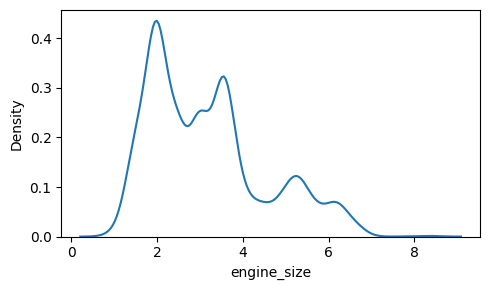

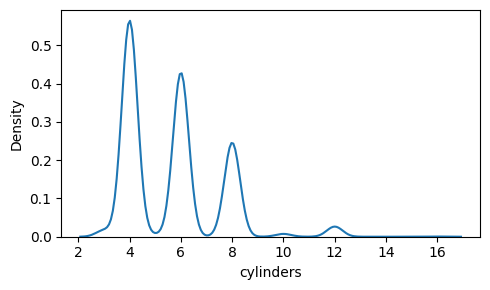

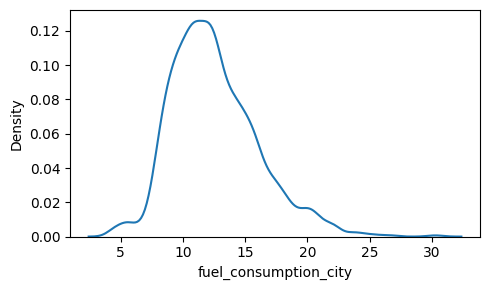

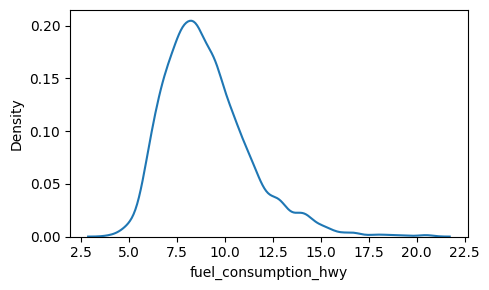

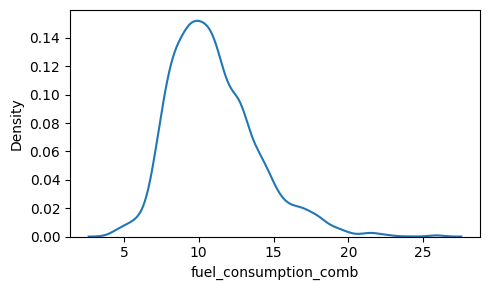

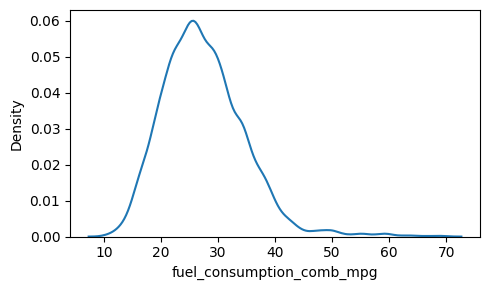

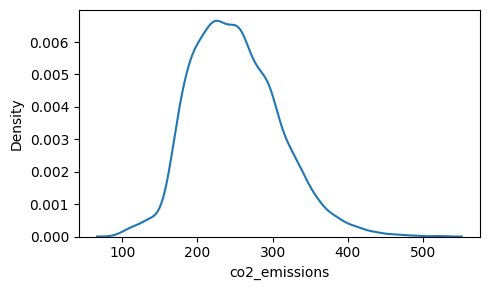

In [9]:
# Visualizing KDE plot for Quantitative variables
for i in transport_df_quantitative.columns:
    plt.figure(figsize=(5, 3))
    sns.kdeplot(data=transport_df, x=transport_df[i])
    plt.tight_layout()

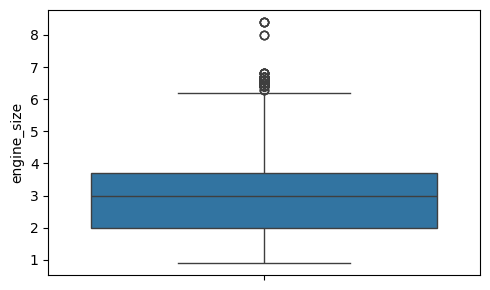

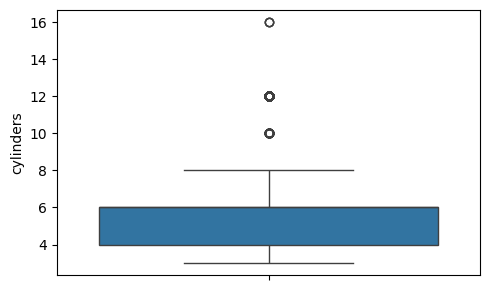

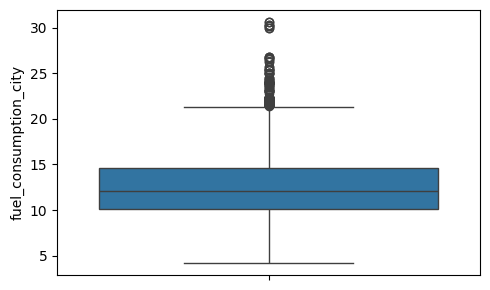

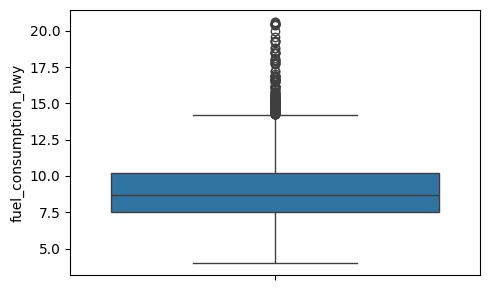

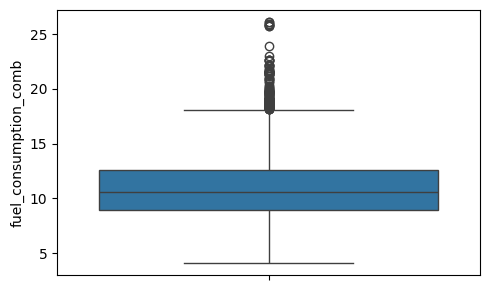

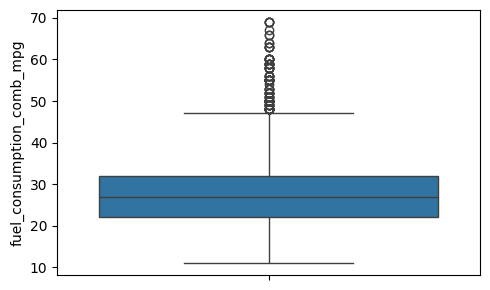

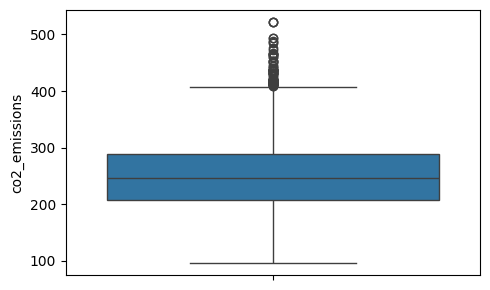

In [10]:
# Visualizing BOX PLOT for Quantitative variables
for i in transport_df_quantitative.columns:
    plt.figure(figsize=(5,3))
    sns_plt = sns.boxplot(data=transport_df, y=i)
    plt.tight_layout()

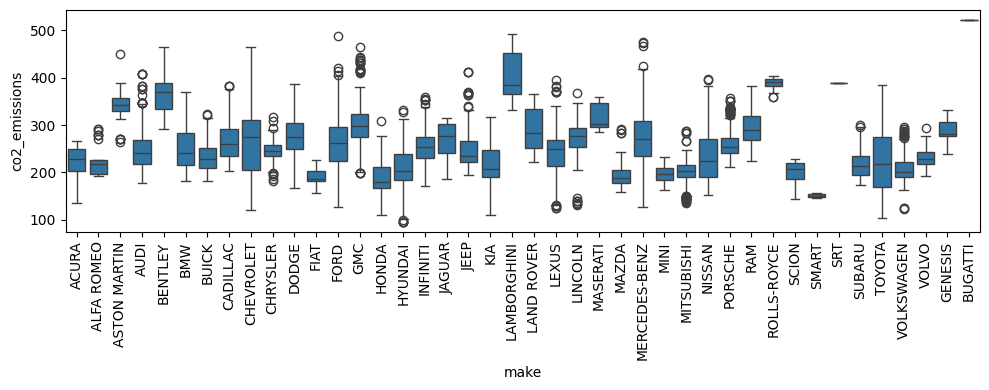

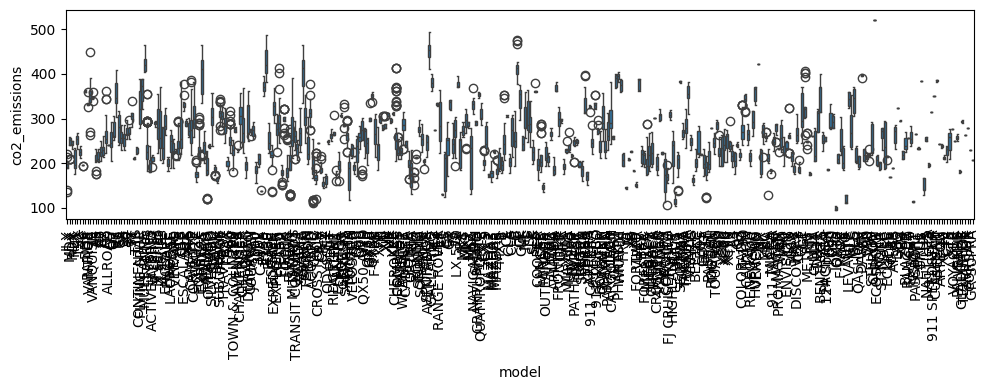

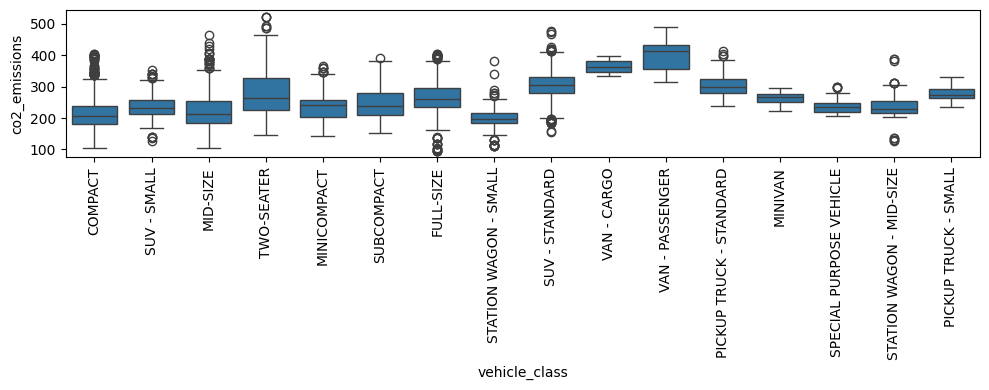

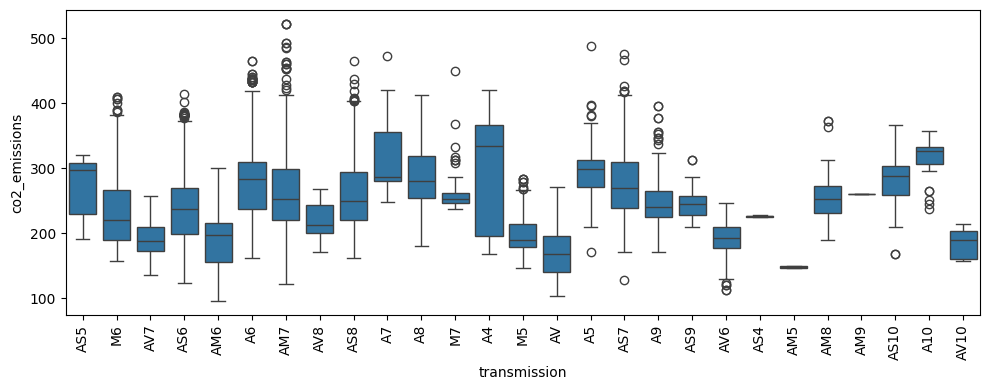

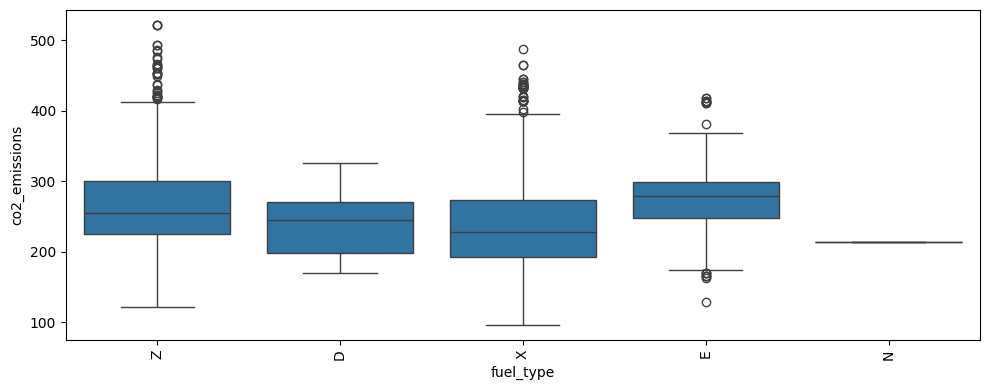

In [11]:
# Visualizing BOX PLOT for Qualitative variables
for i in transport_df_qualitative.columns:
    plt.figure(figsize=(10,4))
    sns_plt = sns.boxplot(data=transport_df, x=i, y='co2_emissions')
    sns_plt.tick_params(axis='x', rotation=90)
    plt.tight_layout()

In [12]:
outliers_indexes = []
target = 'co2_emissions'

# Filter Outliers in the Qualitative (Categorical) Data
for col in transport_df.select_dtypes(include='object').columns:
    for cat in transport_df[col].unique():
        df1 = transport_df[transport_df[col] == cat]
        q1 = df1[target].quantile(0.25)
        q3 = df1[target].quantile(0.75)
        iqr = q3-q1
        maximum = q3 + (1.5 * iqr)
        minimum = q1 - (1.5 * iqr)
        outlier_samples = df1[(df1[target] < minimum) | (df1[target] > maximum)]
        outliers_indexes.extend(outlier_samples.index.tolist())
        
# Filter Outliers in the Quantitative (Numerical) Data        
for col in transport_df.select_dtypes(exclude='object').columns:
    q1 = transport_df[col].quantile(0.25)
    q3 = transport_df[col].quantile(0.75)
    iqr = q3-q1
    maximum = q3 + (1.5 * iqr)
    minimum = q1 - (1.5 * iqr)
    outlier_samples = transport_df[(transport_df[col] < minimum) | (transport_df[col] > maximum)]
    outliers_indexes.extend(outlier_samples.index.tolist())
    
outliers_indexes = list(set(outliers_indexes))
print('{} outliers were identified'.format(len(outliers_indexes)))

982 outliers were identified


In [13]:
# # Check and Validate Ouliers Data
# df1 = transport_df[transport_df['make'] == 'HONDA']
# q1 = df1[target].quantile(0.25)
# q3 = df1[target].quantile(0.75)
# iqr = q3-q1
# maximum = q3 + (1.5 * iqr)
# minimum = q1 - (1.5 * iqr)
# outlier_samples = df1[(df1['co2_emissions'] < minimum) | (df1['co2_emissions'] > maximum)]
# outlier_samples

In [14]:
# (NOTE) :- Even though 982 were marked as OUTLIERS but they are significant and relevant Data so no need to remove them.

In [15]:
# Analysis of CARGO VEHICLES... (Other than ordinary vehicles)

In [16]:
# # Use this code to check vehcile classes and associated vehicle types.
# transport_df[transport_df['vehicle_class'] == 'VAN - CARGO'].sample(n = 20)

In [17]:
# # It has been Identified that vehicle_classes associated with "VAN - CARGO" and "SPECIAL PURPOSE VEHICLE" are only contain Cargo Vehicles
# cargo_vehicle_df = transport_df[(transport_df['vehicle_class'] == 'VAN - CARGO') | (transport_df['vehicle_class'] == 'SPECIAL PURPOSE VEHICLE')]
# cargo_vehicle_df

In [18]:
# # Visualizing unique_categories_count & Observations/sample_count for each categories related to all Qualitative Variables
# for i in transport_df_qualitative.columns:
#     category_count = cargo_vehicle_df[i].value_counts()
#     print(category_count)
#     print("Unique categories count for", i ,":",cargo_vehicle_df[i].nunique())
#     print()

In [19]:
# sns.pairplot(cargo_vehicle_df)

In [20]:
# Quantitative variable Analysis...

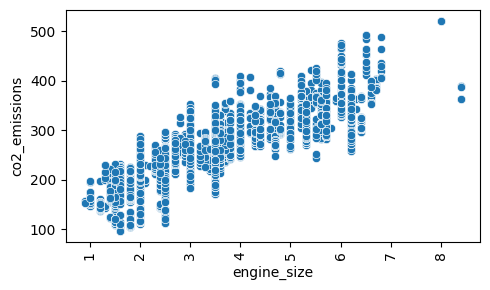

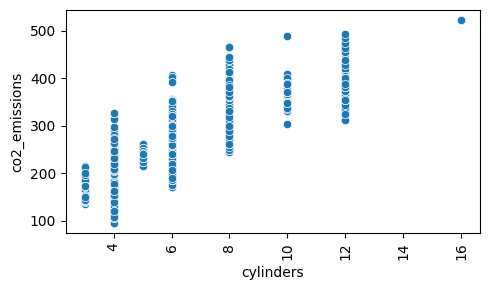

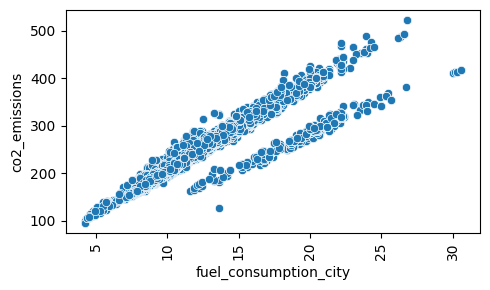

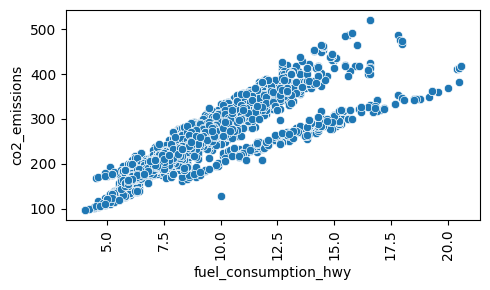

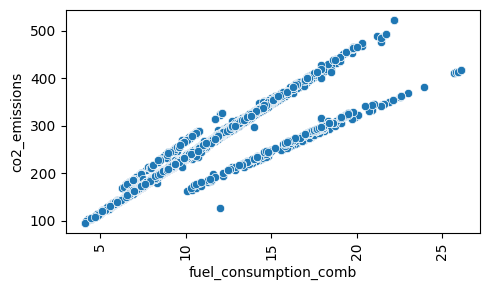

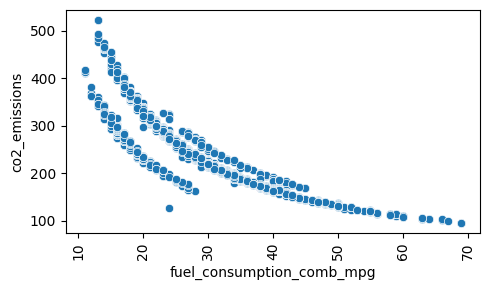

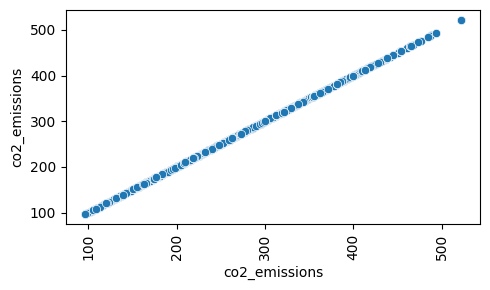

In [21]:
# Visualizing Using SCATTER PLOT
for i in transport_df_quantitative.columns:
    plt.figure(figsize=(5,3))
    sns_plt = sns.scatterplot(data=transport_df, x=i, y='co2_emissions')
    sns_plt.tick_params(axis='x', rotation=90)
    plt.tight_layout()

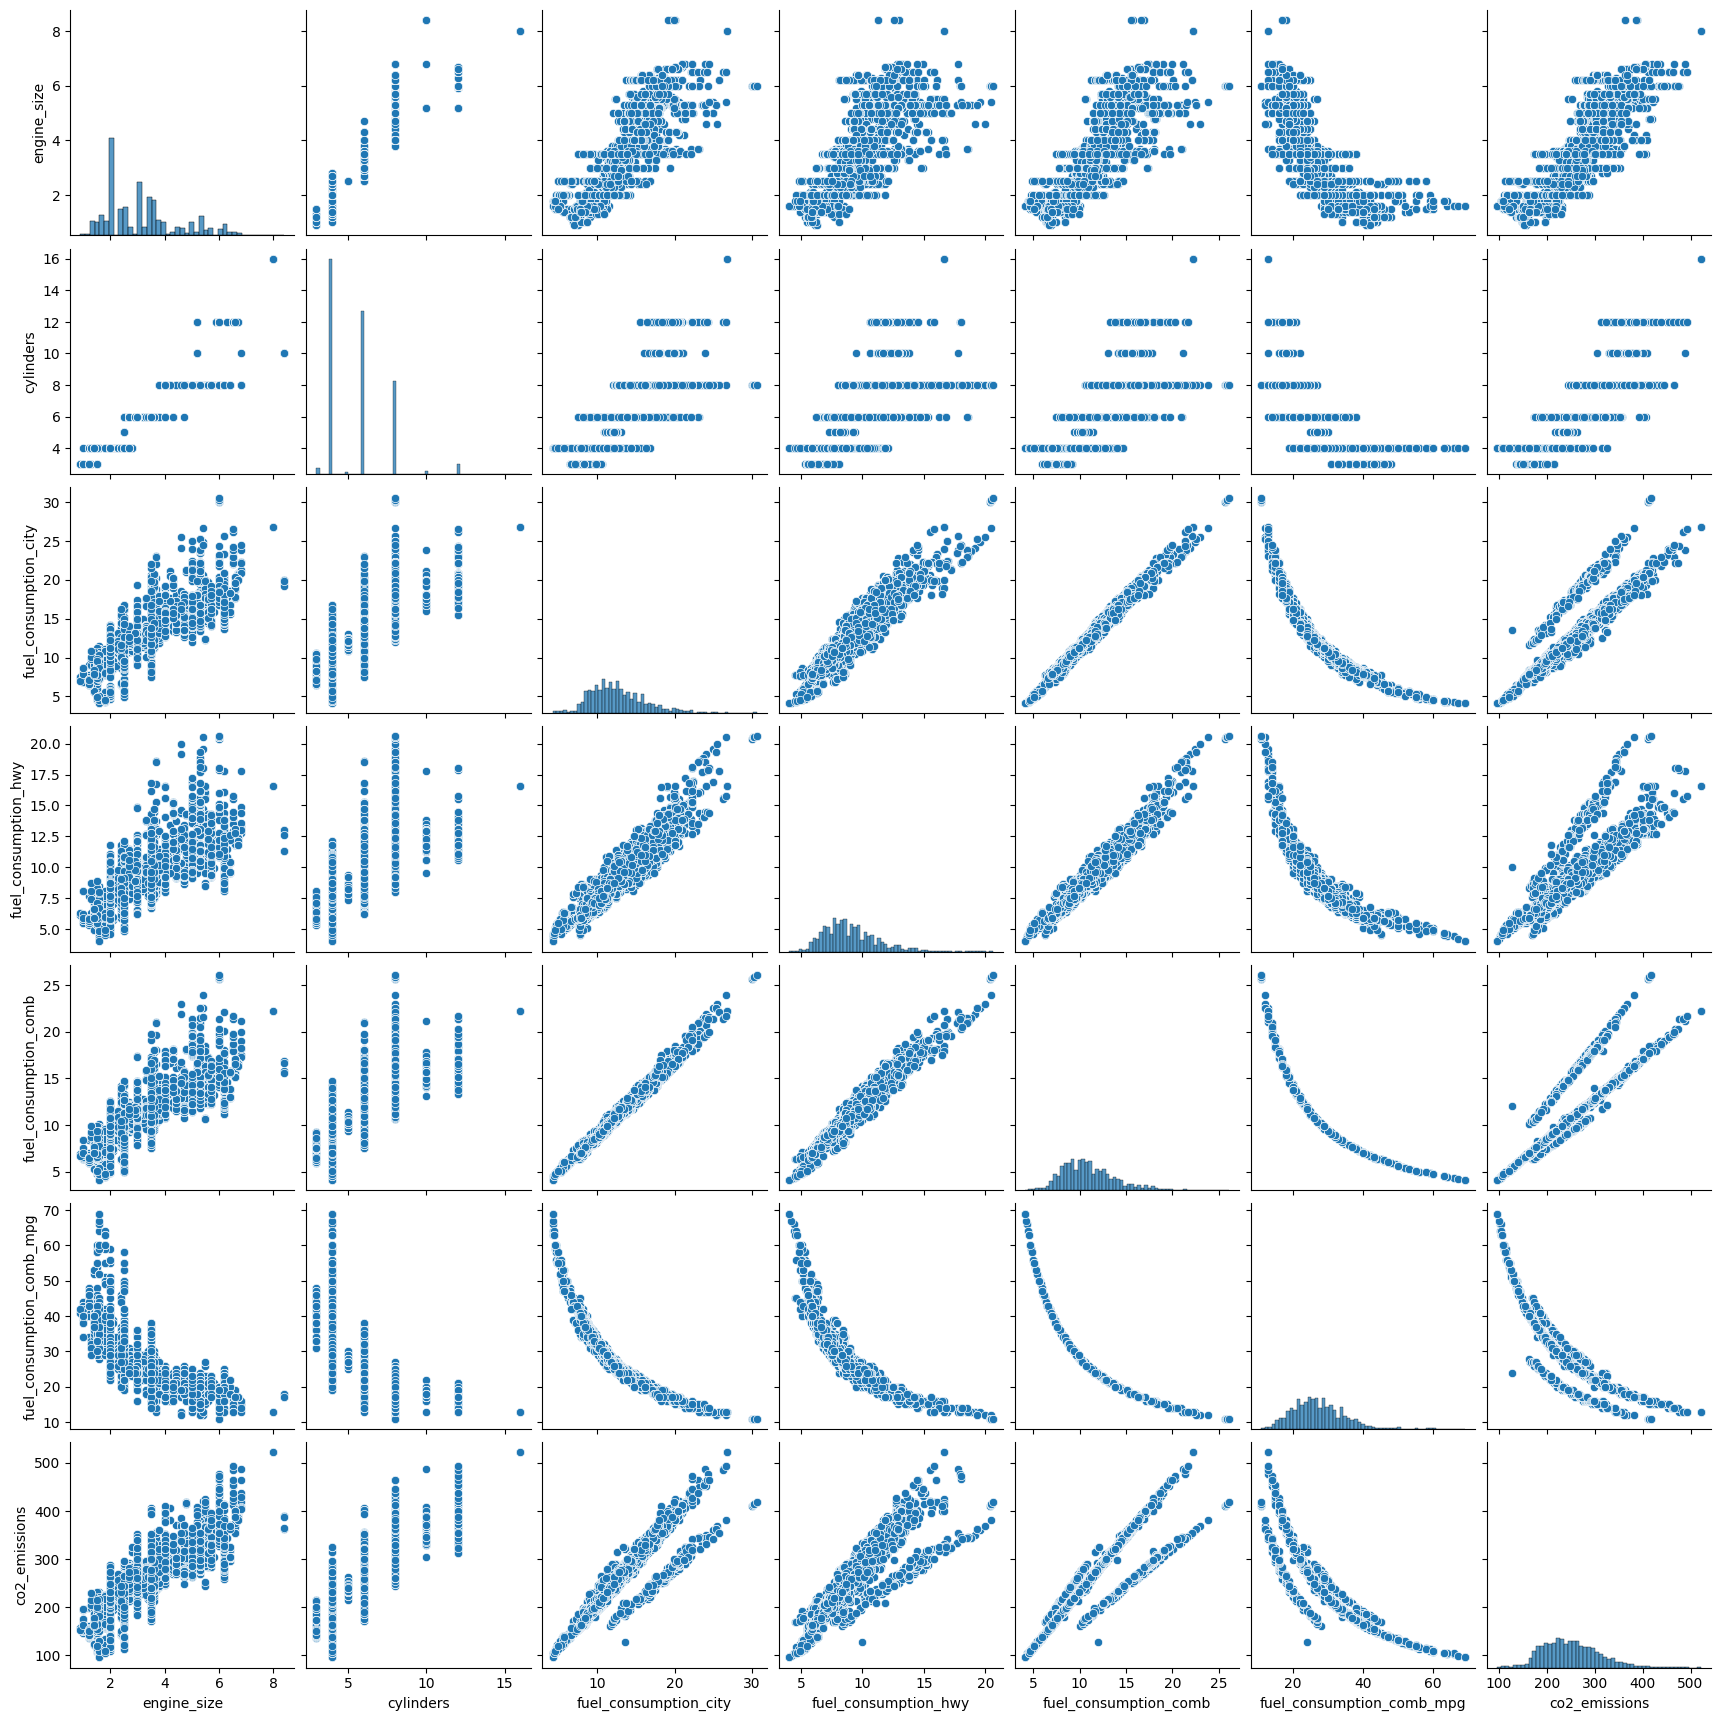

In [22]:
# Visualizing Using PAIR PLOT
sns.pairplot(transport_df)

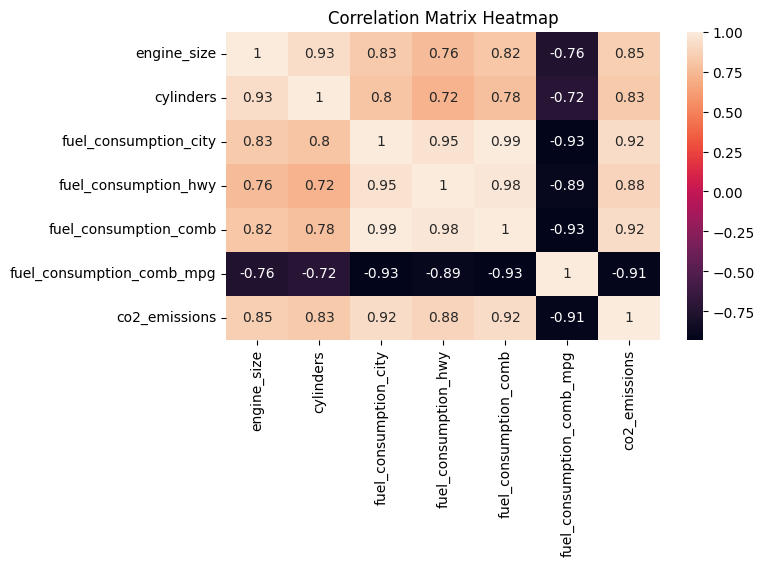

In [23]:
# Calculating the correlation matrix
corr_matrix = transport_df_quantitative.corr()

# Ploting the HEATMAP
plt.figure(figsize=(7, 4))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [24]:
# We can see that High Multicollinearity between "fuel_consumption_comb", "fuel_consumption_city", and "fuel_consumption_hwy".
# So we can have fuel_consumption_comb becuase in my problem its easy to get the combination rather than city and highway specifically.
# And also it will be inaapropriate for the model to have city or highway distance only we mainly see Total(combination) Distance.
# So we can drop "fuel_consumption_city" and "fuel_consumption_hwy"

# Also we can drop "fuel_consumption_comb_mpg" because its just the Duplicate.

dropping_columns_names = ['fuel_consumption_city','fuel_consumption_hwy','fuel_consumption_comb_mpg']
transport_df.drop(columns = dropping_columns_names, inplace=True)
transport_df.head()

make model vehicle_class  engine_size  cylinders transmission fuel_type  \
0  ACURA   ILX       COMPACT          2.0          4          AS5         Z   
1  ACURA   ILX       COMPACT          2.4          4           M6         Z   
2  ACURA   ILX       COMPACT          1.5          4          AV7         Z   
3  ACURA   MDX   SUV - SMALL          3.5          6          AS6         Z   
4  ACURA   RDX   SUV - SMALL          3.5          6          AS6         Z   

   fuel_consumption_comb  co2_emissions  
0                    8.5            196  
1                    9.6            221  
2                    5.9            136  
3                   11.1            255  
4                   10.6            244

In [25]:
# Qualitative variable Analysis...

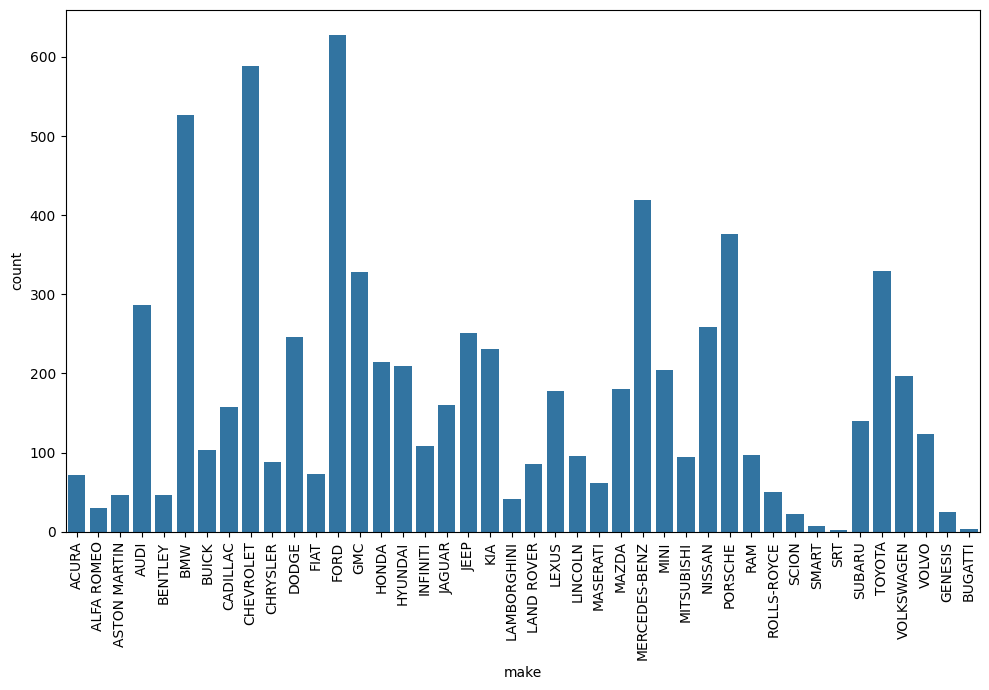

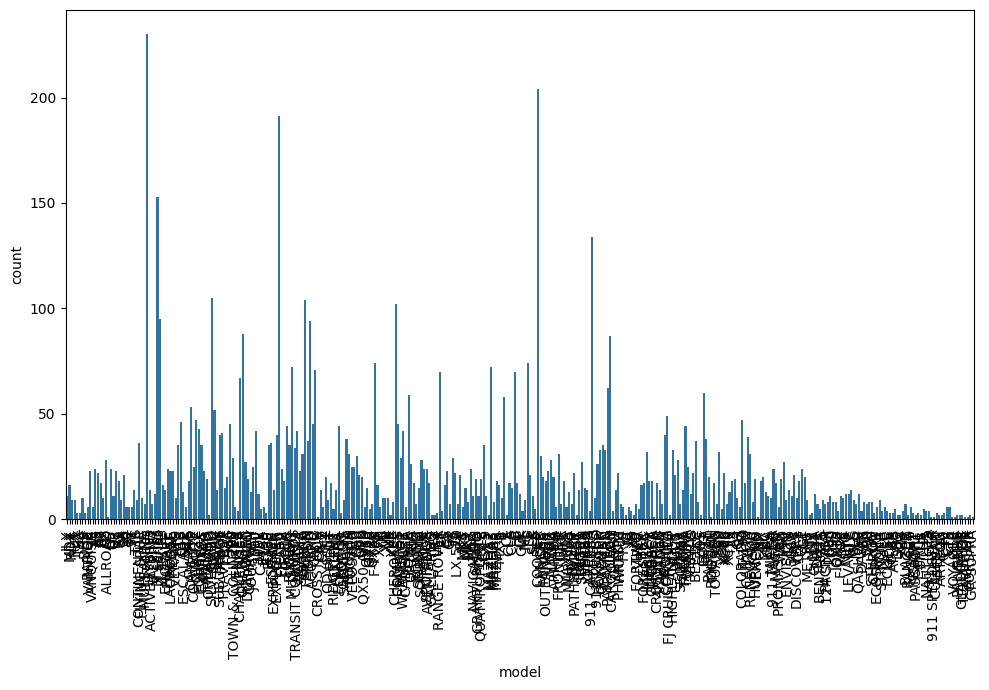

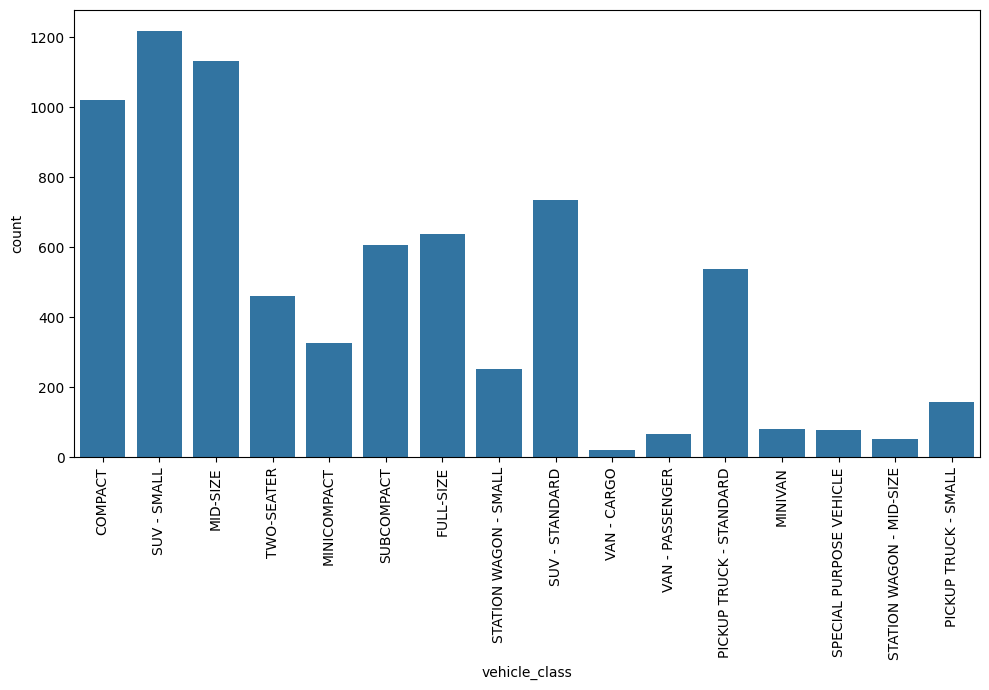

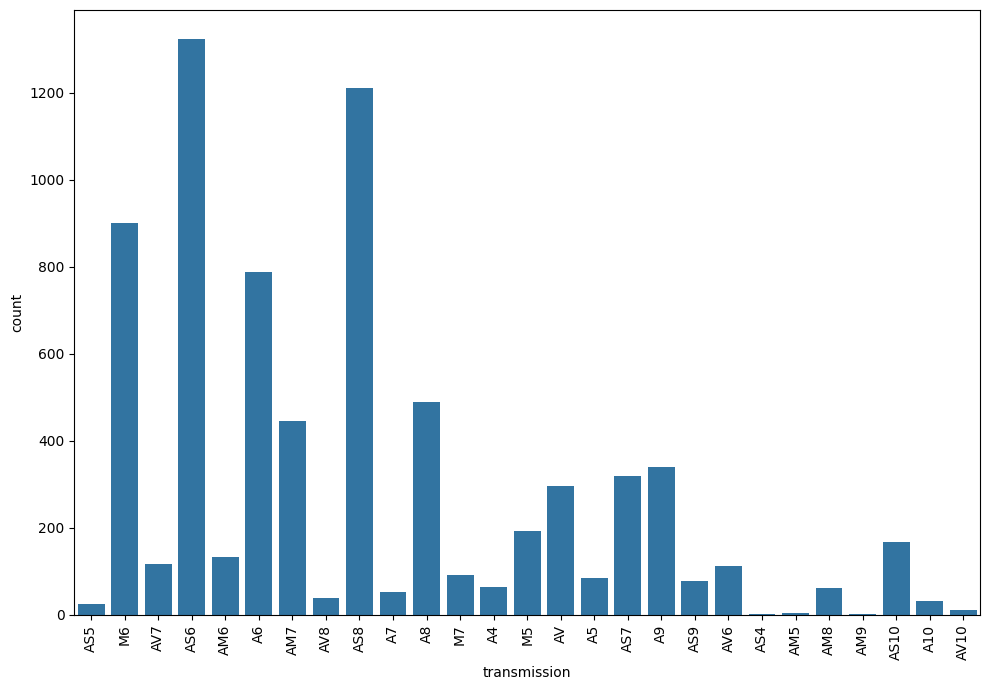

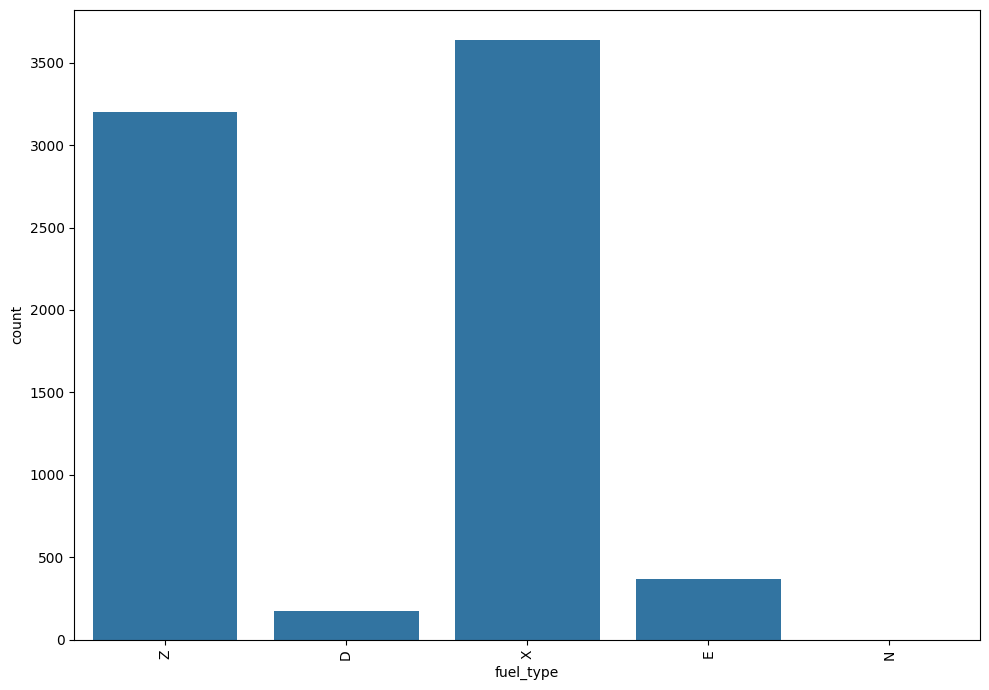

In [26]:
# Visualizing Using COUNT PLOT
for i in transport_df_qualitative.columns:
    plt.figure(figsize=(10,7))
    sns_plt = sns.countplot(data=transport_df_qualitative, x=i)
    sns_plt.tick_params(axis='x', rotation=90)
    plt.tight_layout()

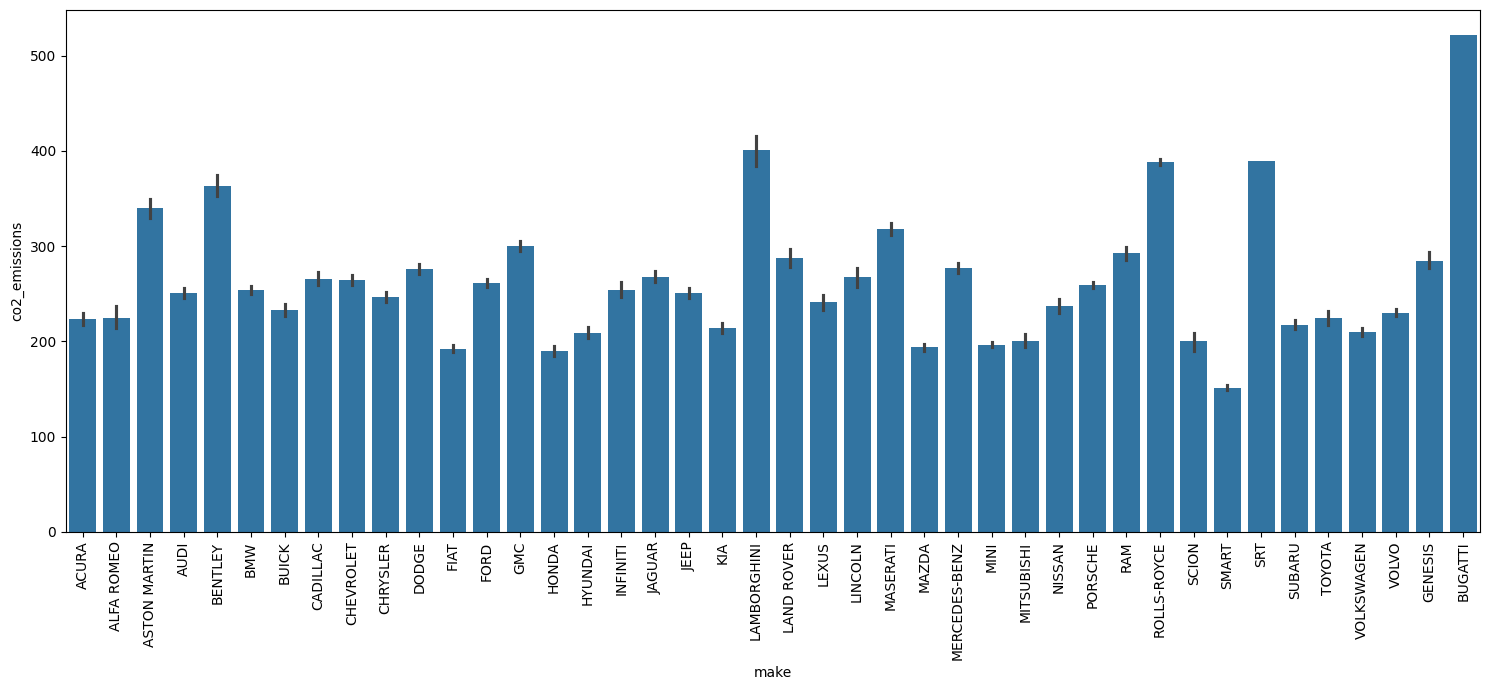

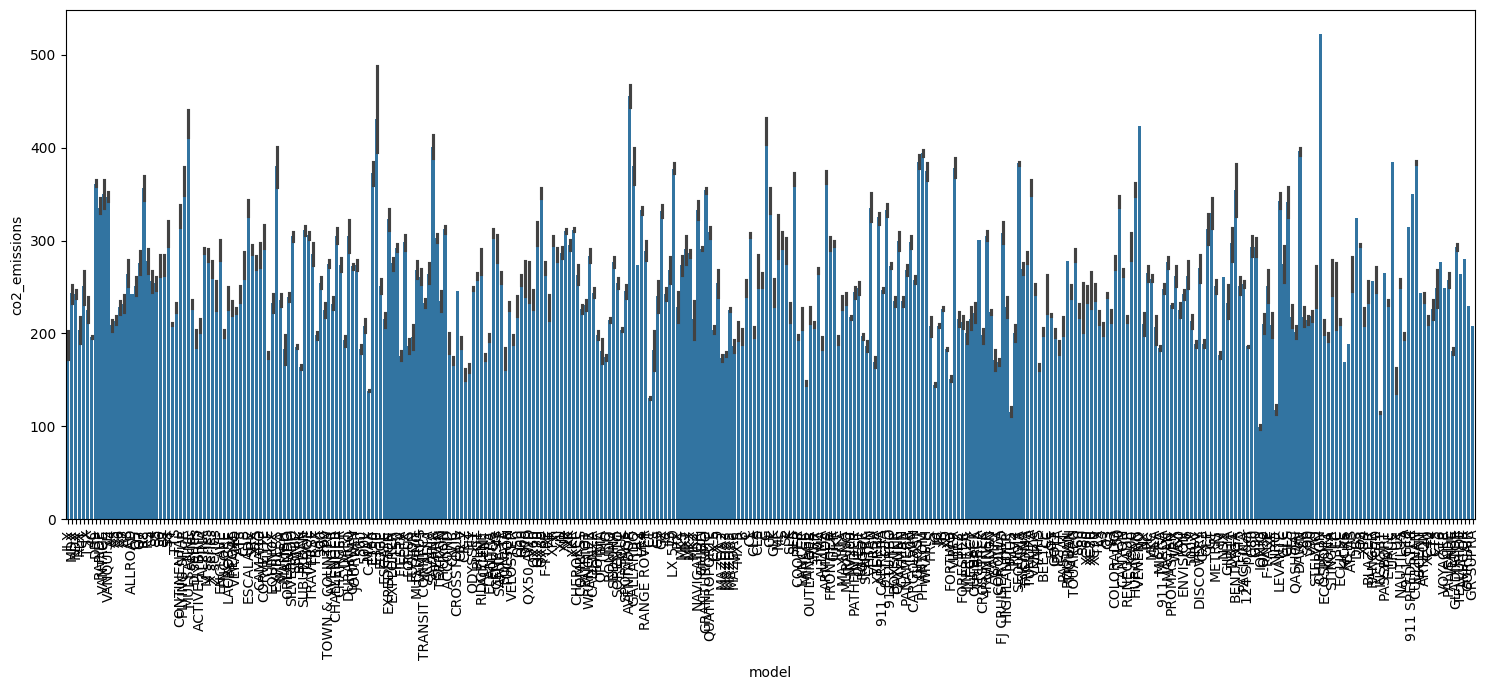

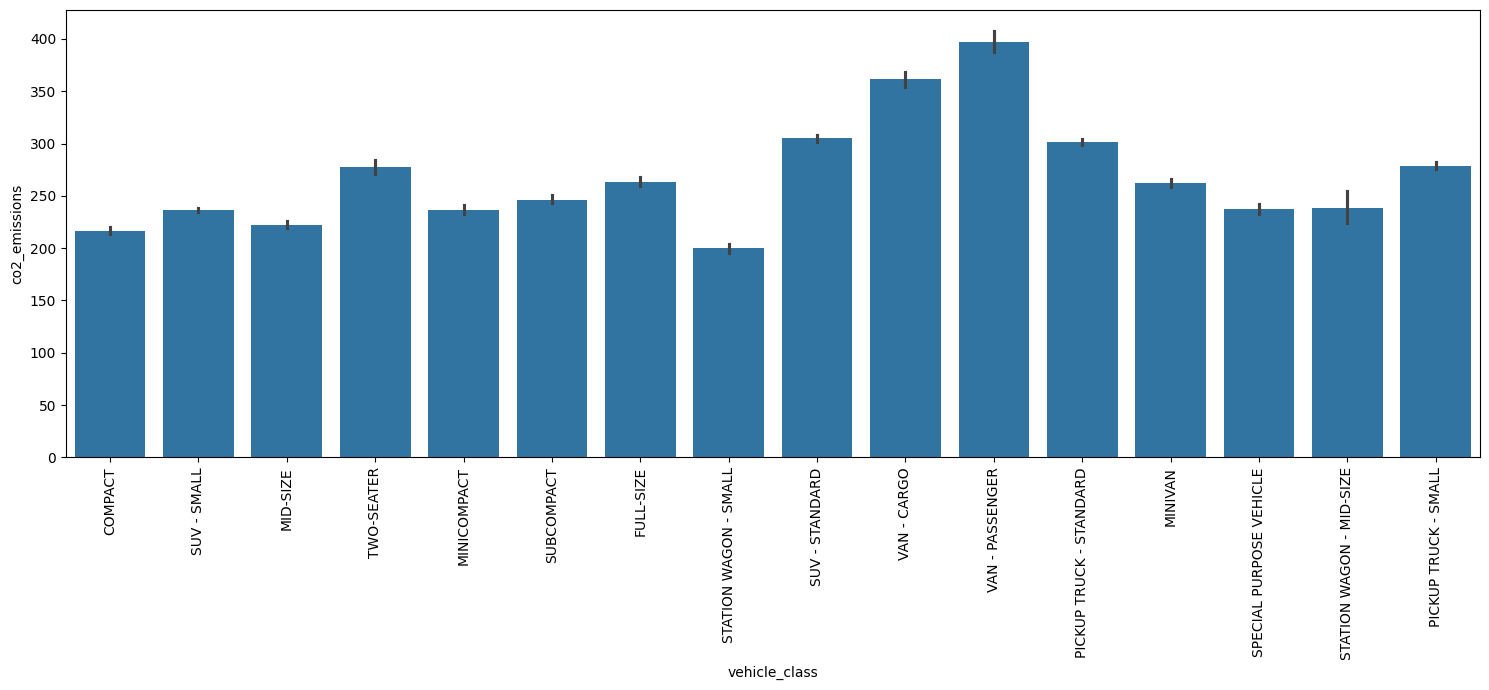

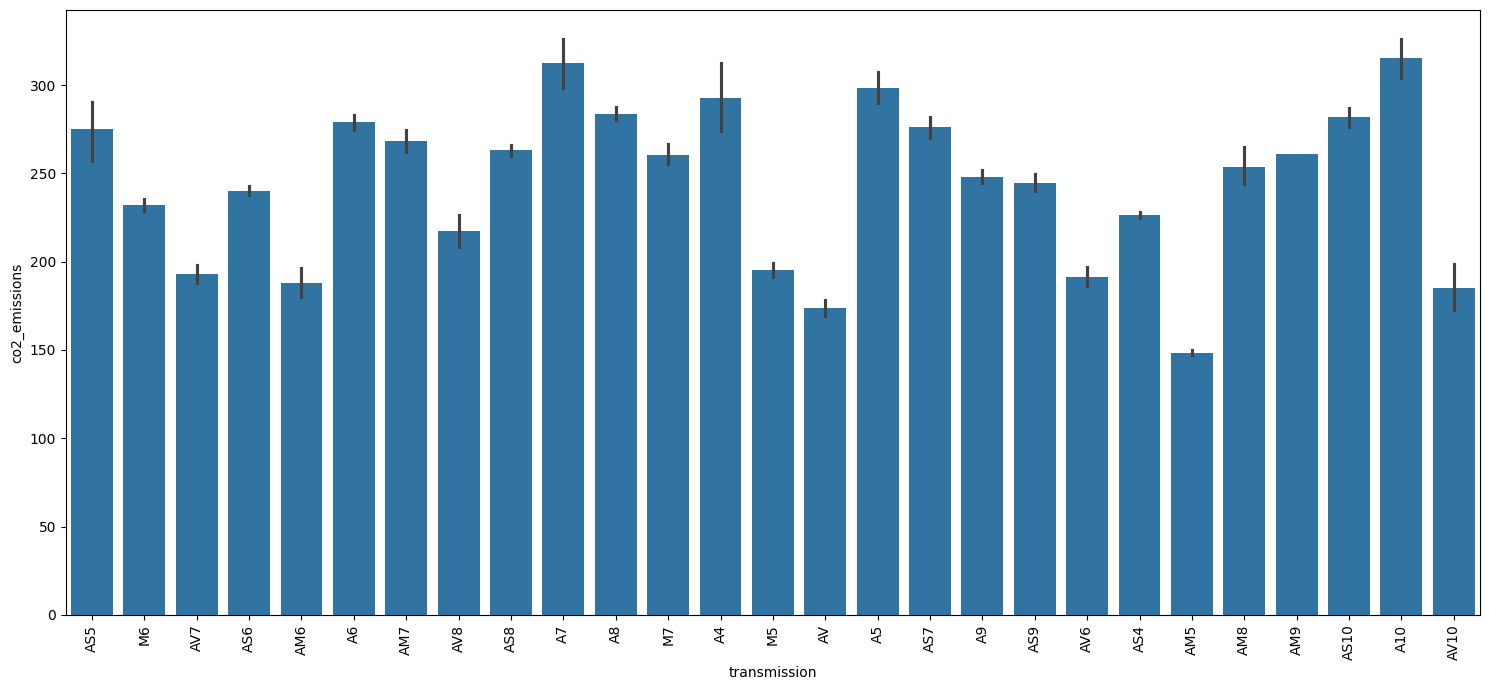

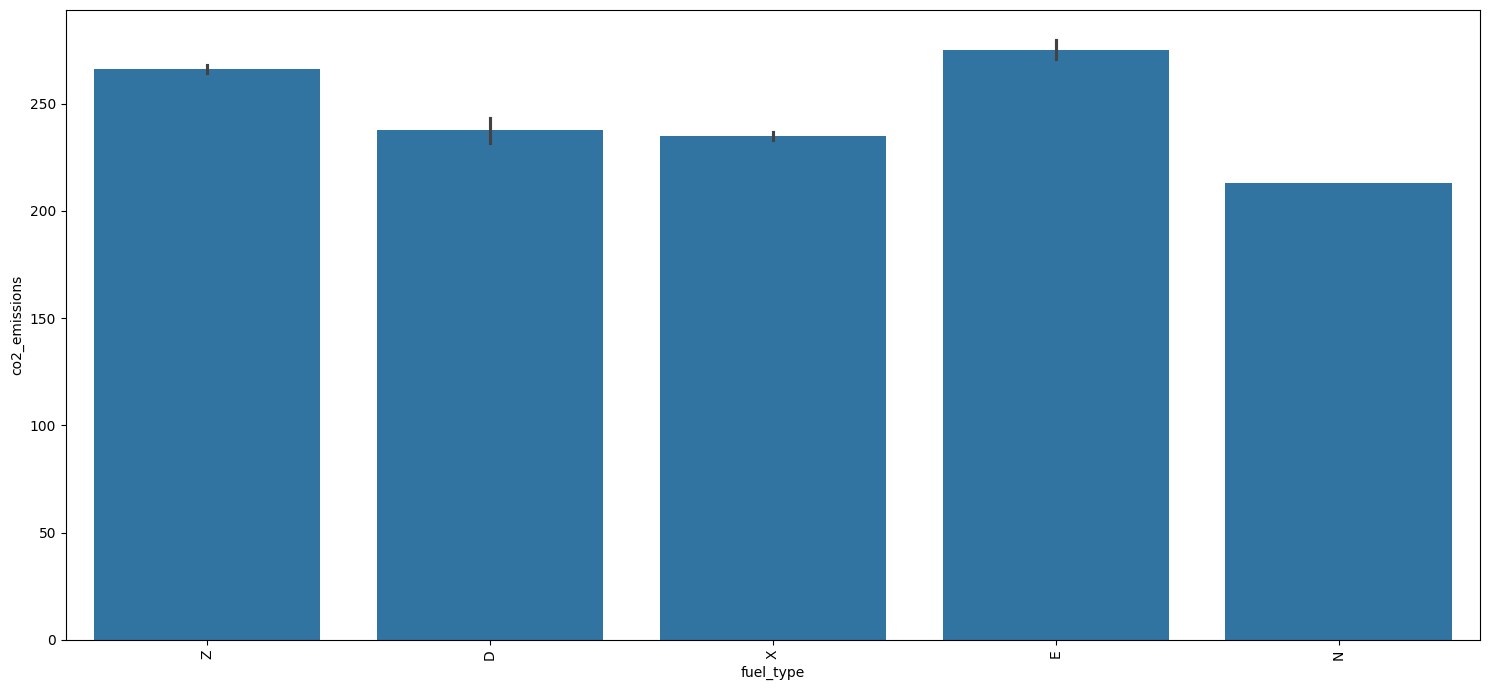

In [27]:
# Visualizing Using BAR PLOT (x -> categorical, y -> target(co2_emissions))
for i in transport_df_qualitative.columns:
    plt.figure(figsize=(15,7))
    bar_plot = sns.barplot(data=transport_df, x=i, y='co2_emissions')
    bar_plot.tick_params(axis='x', rotation=90)
    plt.tight_layout()

In [28]:
# Visualizing unique_categories_count & Observations/sample_count for each categories related to all Qualitative Variables
for i in transport_df_qualitative.columns:
    category_count = transport_df[i].value_counts()
    print(category_count)
    print("Unique categories count for", i ,":",transport_df[i].nunique())
    print()

make
FORD             628
CHEVROLET        588
BMW              527
MERCEDES-BENZ    419
PORSCHE          376
TOYOTA           330
GMC              328
AUDI             286
NISSAN           259
JEEP             251
DODGE            246
KIA              231
HONDA            214
HYUNDAI          210
MINI             204
VOLKSWAGEN       197
MAZDA            180
LEXUS            178
JAGUAR           160
CADILLAC         158
SUBARU           140
VOLVO            124
INFINITI         108
BUICK            103
RAM               97
LINCOLN           96
MITSUBISHI        95
CHRYSLER          88
LAND ROVER        85
FIAT              73
ACURA             72
MASERATI          61
ROLLS-ROYCE       50
ASTON MARTIN      47
BENTLEY           46
LAMBORGHINI       41
ALFA ROMEO        30
GENESIS           25
SCION             22
SMART              7
BUGATTI            3
SRT                2
Name: count, dtype: int64
Unique categories count for make : 42

model
I series       230
COOPER         204
F-15

In [29]:
# Removing the fuel_type == N observation because only 1 data is associated with that fuel_type
transport_df = transport_df[transport_df['fuel_type'] != 'N']
transport_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7384 entries, 0 to 7384
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   make                   7384 non-null   object 
 1   model                  7384 non-null   object 
 2   vehicle_class          7384 non-null   object 
 3   engine_size            7384 non-null   float64
 4   cylinders              7384 non-null   int64  
 5   transmission           7384 non-null   object 
 6   fuel_type              7384 non-null   object 
 7   fuel_consumption_comb  7384 non-null   float64
 8   co2_emissions          7384 non-null   int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 576.9+ KB


In [30]:
transport_df.reset_index(drop=True, inplace=True)
transport_df.tail(5)

make model   vehicle_class  engine_size  cylinders transmission  \
7379  VOLVO  XC40     SUV - SMALL          2.0          4          AS8   
7380  VOLVO  XC60     SUV - SMALL          2.0          4          AS8   
7381  VOLVO  XC60     SUV - SMALL          2.0          4          AS8   
7382  VOLVO  XC90  SUV - STANDARD          2.0          4          AS8   
7383  VOLVO  XC90  SUV - STANDARD          2.0          4          AS8   

     fuel_type  fuel_consumption_comb  co2_emissions  
7379         Z                    9.4            219  
7380         Z                    9.9            232  
7381         Z                   10.3            240  
7382         Z                    9.9            232  
7383         Z                   10.7            248

In [31]:
# # Grouping MAKE categories which cumulative frequency lies beyond 95% to a common category named as "OTHERS"
# category_counts = transport_df['make'].value_counts().sort_values(ascending=False)
# total_count = category_counts.sum()
# cumulative_freq = (category_counts.cumsum() / total_count) * 100  # Calculate cumulative frequency in percentage

# # # Create a DataFrame to store the results
# # result_df = pd.DataFrame({
# #     'Category': category_counts.index,
# #     'Frequency': category_counts.values,
# #     'Cumulative Frequency (%)': cumulative_freq.values
# # })

# # # Display the DataFrame
# # result_df.to_csv('model_analysis.csv', index=False)

# # Identify categories where cumulative frequency exceeds 95%
# categories_to_replace = cumulative_freq[cumulative_freq > 95].index
# # print(categories_to_replace)

# # Replace those categories with 'OTHERS'
# transport_df['make'] = transport_df['make'].apply(lambda x: 'others' if x in categories_to_replace else x)

In [32]:
# transport_df['make'].value_counts()

In [33]:
# transport_df['make'].nunique()

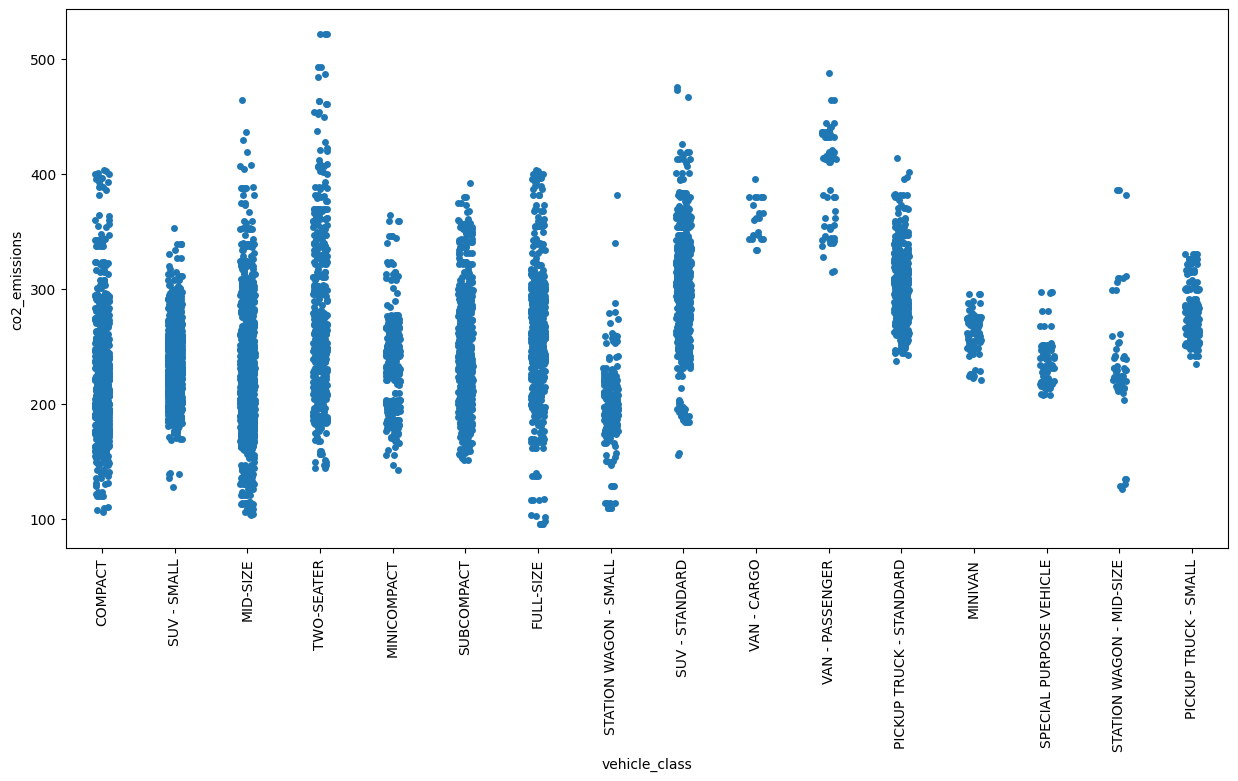

In [34]:
# Strip Plot of vehicle_class before Grouping
plt.figure(figsize=(15, 7))
sns_plt = sns.stripplot(data=transport_df, x=transport_df['vehicle_class'], y=transport_df['co2_emissions'], jitter=True)
sns_plt.tick_params(axis='x', rotation=90)
plt.show()

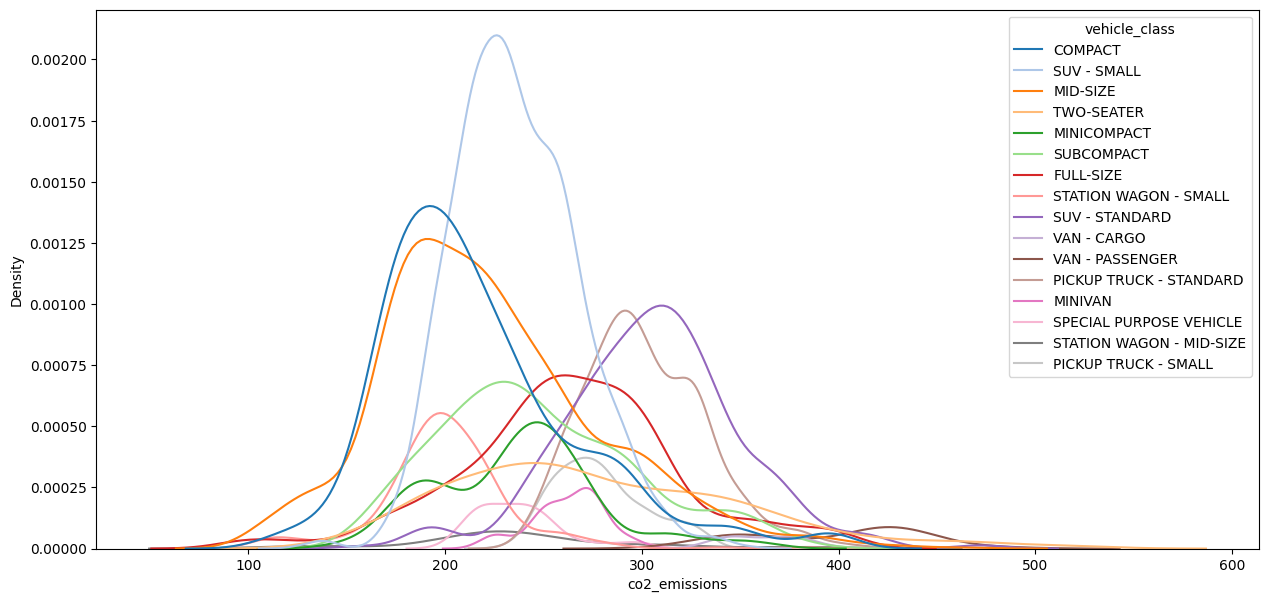

In [35]:
# Define a custom color palette with distinct colors
custom_palette = sns.color_palette("tab20", n_colors=len(transport_df['vehicle_class'].unique()))

# KDE plot each category in vehicle_class
plt.figure(figsize=(15, 7))
sns.kdeplot(data=transport_df, x=transport_df['co2_emissions'], hue=transport_df['vehicle_class'], fill=False, palette=custom_palette)
plt.show()

In [36]:
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew, kurtosis

# Calculate Summary Statistics
# Mean, Median, Standard Deviation
summary_stats = transport_df.groupby('vehicle_class')['co2_emissions'].agg(['mean', 'median', 'std'])

# # Skewness, Kurtosis
# summary_stats['skewness'] = transport_df.groupby('vehicle_class')['co2_emissions'].apply(skew)
# summary_stats['kurtosis'] = transport_df.groupby('vehicle_class')['co2_emissions'].apply(kurtosis)

# Feature Scaling
scaler = StandardScaler()
summary_stats_scaled = scaler.fit_transform(summary_stats)
summary_stats

mean  median        std
vehicle_class                                          
COMPACT                   216.679061   206.5  50.443913
FULL-SIZE                 263.316119   261.0  55.054891
MID-SIZE                  222.463781   214.0  55.626307
MINICOMPACT               236.607362   242.0  40.971650
MINIVAN                   262.312500   265.5  17.744740
PICKUP TRUCK - SMALL      278.968553   274.0  22.891439
PICKUP TRUCK - STANDARD   301.513011   298.0  30.477161
SPECIAL PURPOSE VEHICLE   237.597403   234.0  21.961845
STATION WAGON - MID-SIZE  238.698113   230.0  56.414532
STATION WAGON - SMALL     200.067460   198.0  33.410274
SUBCOMPACT                246.448845   239.0  49.772772
SUV - SMALL               236.292523   233.0  31.217718
SUV - STANDARD            304.836735   305.0  44.356378
TWO-SEATER                277.454348   265.0  73.555309
VAN - CARGO               361.500000   362.0  17.874563
VAN - PASSENGER           397.212121   414.0  42.272928

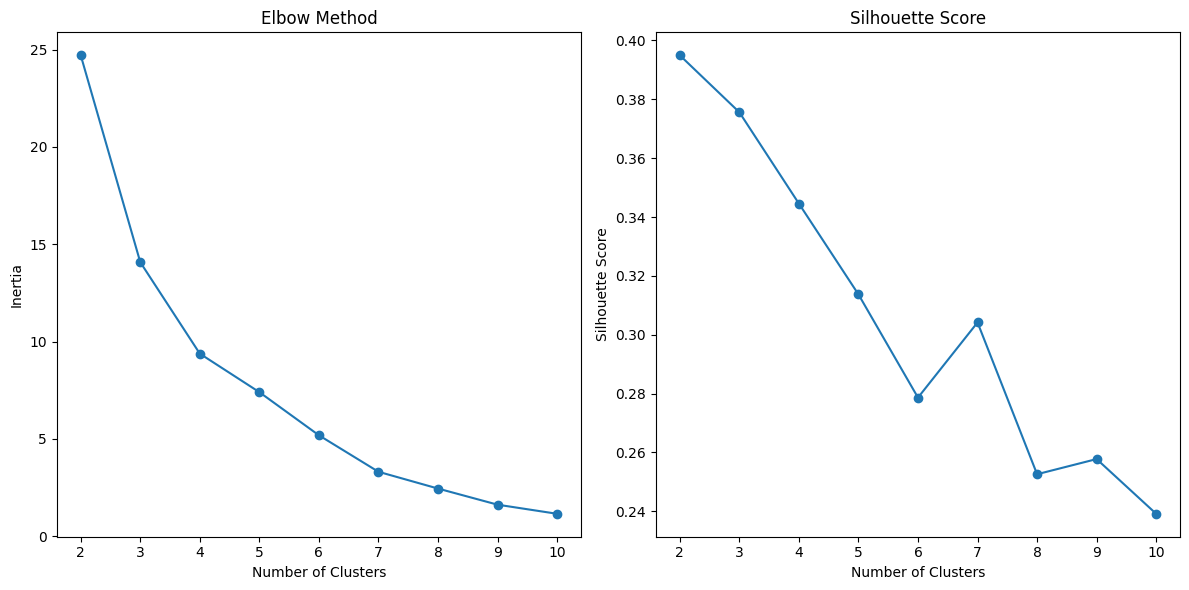

In [37]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Finding the correct n_clusters value using Elbow_method and using Silhouette_scores

# Empty lists to store inertia and silhouette scores
inertia_values = []
silhouette_scores = []

# Define range of clusters to try
range_n_clusters = range(2, 11)  # You can adjust this range as needed

for n_clusters in range_n_clusters:
    # Initialize KMeans with current number of clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    # Fit KMeans to the data
    kmeans.fit(summary_stats_scaled)
    
    # Compute the inertia
    inertia_values.append(kmeans.inertia_)
    
    # Compute the silhouette score
    if n_clusters > 1:  # Silhouette score requires at least 2 clusters
        silhouette_scores.append(silhouette_score(summary_stats_scaled, kmeans.labels_))
    else:
        silhouette_scores.append(np.nan)  # No silhouette score for 1 cluster

# Plot the elbow method
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range_n_clusters, inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')

# Plot the silhouette scores
plt.subplot(1, 2, 2)
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')

plt.tight_layout()
plt.show()

In [38]:
# Cluster Analysis using K-means Clustering
kmeans = KMeans(n_clusters=7, random_state=42, n_init=10)
clusters = kmeans.fit_predict(summary_stats_scaled)

# Grouping
# Adding cluster labels to the DataFrame
summary_stats['cluster'] = ['cluster' + str(cluster) for cluster in clusters]
summary_stats

mean  median        std   cluster
vehicle_class                                                    
COMPACT                   216.679061   206.5  50.443913  cluster0
FULL-SIZE                 263.316119   261.0  55.054891  cluster0
MID-SIZE                  222.463781   214.0  55.626307  cluster0
MINICOMPACT               236.607362   242.0  40.971650  cluster0
MINIVAN                   262.312500   265.5  17.744740  cluster2
PICKUP TRUCK - SMALL      278.968553   274.0  22.891439  cluster2
PICKUP TRUCK - STANDARD   301.513011   298.0  30.477161  cluster6
SPECIAL PURPOSE VEHICLE   237.597403   234.0  21.961845  cluster3
STATION WAGON - MID-SIZE  238.698113   230.0  56.414532  cluster0
STATION WAGON - SMALL     200.067460   198.0  33.410274  cluster3
SUBCOMPACT                246.448845   239.0  49.772772  cluster0
SUV - SMALL               236.292523   233.0  31.217718  cluster3
SUV - STANDARD            304.836735   305.0  44.356378  cluster6
TWO-SEATER                277.454348   265.0  73.555309  cluster5
VAN - CARGO               361.500000   362.0  17.874563  cluster1
VAN - PASSENGER           397.212121   414.0  42.272928  cluster4

In [39]:
# Step 5: Validation (Optional)
# You can further analyze and validate the grouping by examining the characteristics of each cluster

# Output the grouped categories
grouped_categories = summary_stats.groupby('cluster').apply(lambda x: x.index.tolist()).tolist()
print("Grouped Categories:", grouped_categories)

Grouped Categories: [['COMPACT', 'FULL-SIZE', 'MID-SIZE', 'MINICOMPACT', 'STATION WAGON - MID-SIZE', 'SUBCOMPACT'], ['VAN - CARGO'], ['MINIVAN', 'PICKUP TRUCK - SMALL'], ['SPECIAL PURPOSE VEHICLE', 'STATION WAGON - SMALL', 'SUV - SMALL'], ['VAN - PASSENGER'], ['TWO-SEATER'], ['PICKUP TRUCK - STANDARD', 'SUV - STANDARD']]


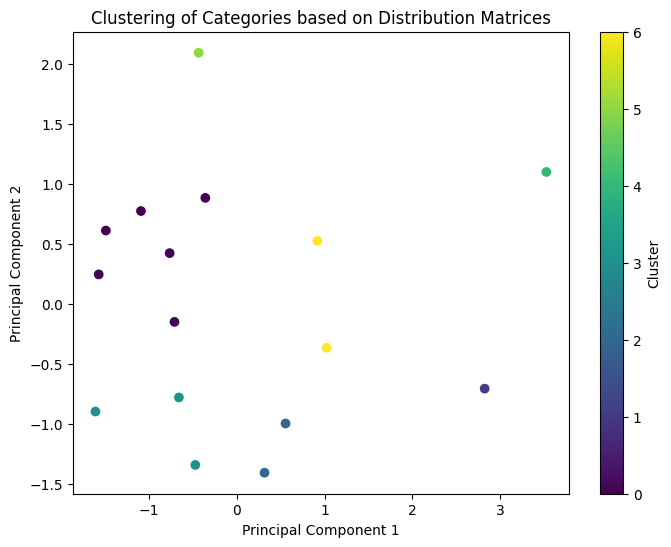

In [40]:
from sklearn.decomposition import PCA

# Step 5: Dimensionality Reduction using PCA
pca = PCA(n_components=2)
summary_stats_pca = pca.fit_transform(summary_stats_scaled)

# Step 6: Visualize Clusters
plt.figure(figsize=(8, 6))
plt.scatter(summary_stats_pca[:, 0], summary_stats_pca[:, 1], c=clusters)
# sns.scatterplot(x=summary_stats_pca[:, 0], y=summary_stats_pca[:, 1], hue=clusters, palette='Set1', legend='full')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering of Categories based on Distribution Matrices')
plt.colorbar(label='Cluster')
plt.show()

In [41]:
# Applying the Grouping to the transport_df dataframe.

# # Map vehicle_class category to cluster label.
# category_cluster_mapping = dict(zip(summary_stats.index, clusters))

# Map vehicle_class category to cluster label with the string "cluster"
category_cluster_mapping = {key: "cluster" + str(value) for key, value in zip(summary_stats.index, clusters)}

# Apply cluster grouping to categorical variable
# transport_df['vehicle_class'] = transport_df['vehicle_class'].map(category_cluster_mapping)
transport_df.loc[:, 'vehicle_class'] = transport_df['vehicle_class'].map(category_cluster_mapping)

# Output the dataframe with cluster labels
transport_df

make model vehicle_class  engine_size  cylinders transmission  \
0     ACURA   ILX      cluster0          2.0          4          AS5   
1     ACURA   ILX      cluster0          2.4          4           M6   
2     ACURA   ILX      cluster0          1.5          4          AV7   
3     ACURA   MDX      cluster3          3.5          6          AS6   
4     ACURA   RDX      cluster3          3.5          6          AS6   
...     ...   ...           ...          ...        ...          ...   
7379  VOLVO  XC40      cluster3          2.0          4          AS8   
7380  VOLVO  XC60      cluster3          2.0          4          AS8   
7381  VOLVO  XC60      cluster3          2.0          4          AS8   
7382  VOLVO  XC90      cluster6          2.0          4          AS8   
7383  VOLVO  XC90      cluster6          2.0          4          AS8   

     fuel_type  fuel_consumption_comb  co2_emissions  
0            Z                    8.5            196  
1            Z                    9.6            221  
2            Z                    5.9            136  
3            Z                   11.1            255  
4            Z                   10.6            244  
...        ...                    ...            ...  
7379         Z                    9.4            219  
7380         Z                    9.9            232  
7381         Z                   10.3            240  
7382         Z                    9.9            232  
7383         Z                   10.7            248  

[7384 rows x 9 columns]

In [42]:
# Viewing the counts associated with vehicle_class after grouping
transport_df['vehicle_class'].value_counts()

vehicle_class
cluster0    3778
cluster3    1546
cluster6    1273
cluster5     460
cluster2     239
cluster4      66
cluster1      22
Name: count, dtype: int64

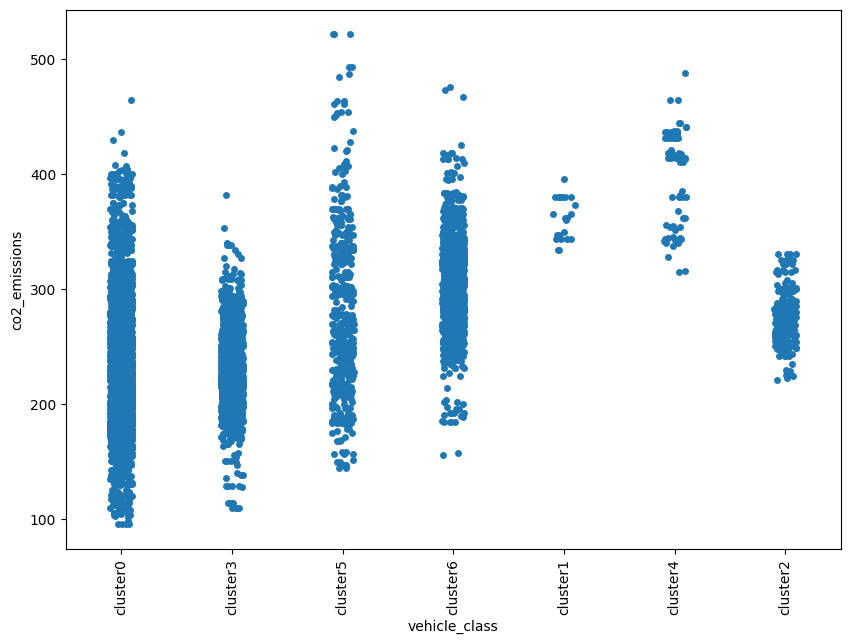

In [43]:
# Strip Plot of vehicle_class
plt.figure(figsize=(10, 7))
sns_plt = sns.stripplot(data=transport_df, x=transport_df['vehicle_class'], y=transport_df['co2_emissions'], jitter=True)
sns_plt.tick_params(axis='x', rotation=90)
plt.show()

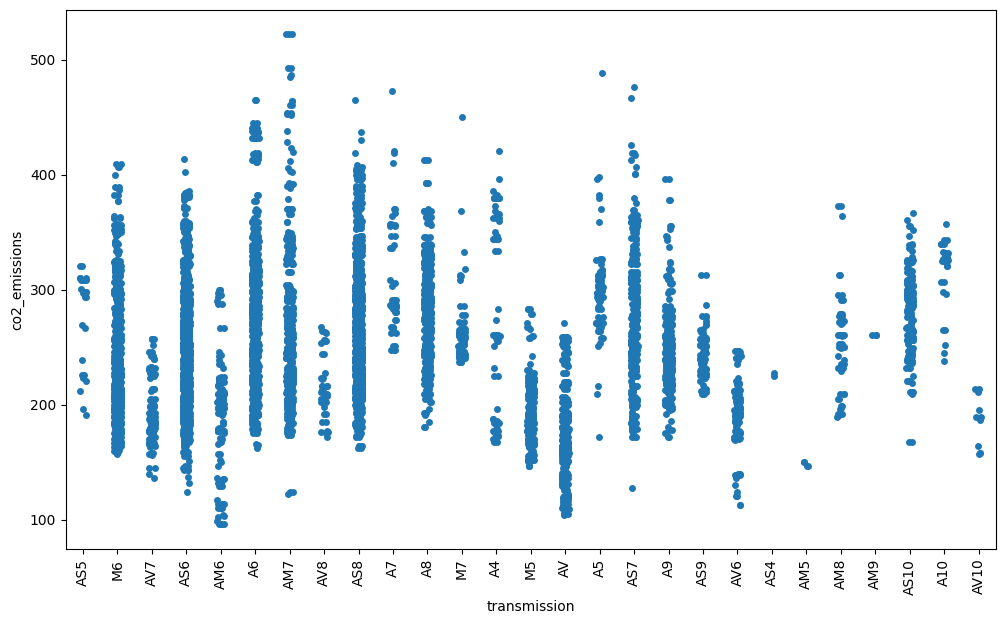

In [44]:
# Strip Plot of Transmission with Gear_numbers
plt.figure(figsize=(12, 7))
sns_plt = sns.stripplot(data=transport_df, x=transport_df['transmission'], y=transport_df['co2_emissions'], jitter=True)
sns_plt.tick_params(axis='x', rotation=90)
plt.show()

In [45]:
import re

# Remove Gear_numbers that associated with Transmission
# transport_df['transmission'] = [re.sub(r'\d+$', '', x) for x in transport_df['transmission']]
transport_df.loc[:, 'transmission'] = [re.sub(r'\d+$', '', x) for x in transport_df['transmission']]

In [46]:
# Viewing the counts associated with Transmission after removing Gear_numbers
transport_df['transmission'].value_counts()

transmission
AS    3126
A     1851
M     1185
AM     646
AV     576
Name: count, dtype: int64

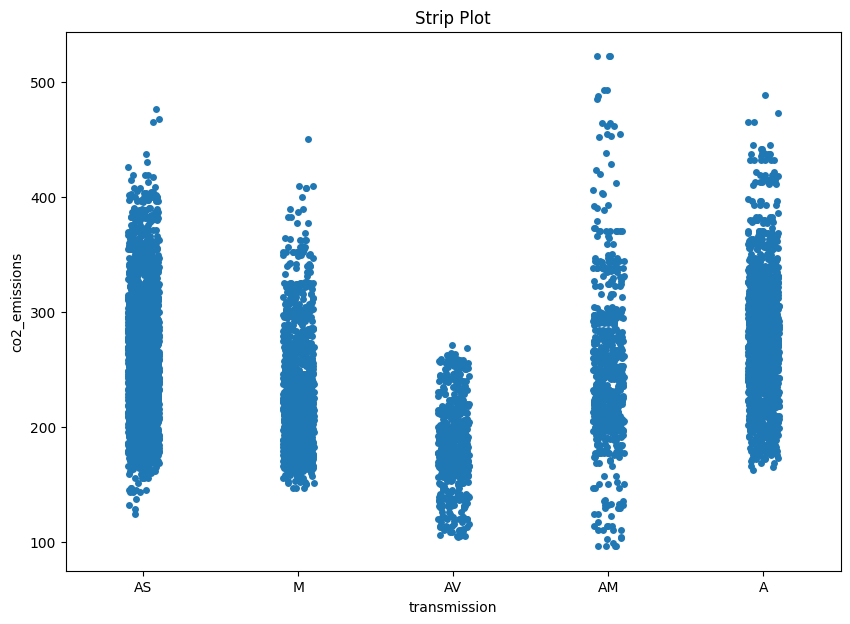

In [47]:
# Strip Plot of Transmission with out Gear_numbers
plt.figure(figsize=(10, 7))
sns.stripplot(data=transport_df, x=transport_df['transmission'], y=transport_df['co2_emissions'], jitter=True)
plt.title('Strip Plot')
plt.show()

In [48]:
# Visualizing unique_categories_count & Observations/sample_count for each categories related to all Qualitative Variables
for i in transport_df_qualitative.columns:
    category_count = transport_df[i].value_counts()
    print(category_count)
    print("Unique categories count for", i ,":",transport_df[i].nunique())
    print()

make
FORD             628
CHEVROLET        587
BMW              527
MERCEDES-BENZ    419
PORSCHE          376
TOYOTA           330
GMC              328
AUDI             286
NISSAN           259
JEEP             251
DODGE            246
KIA              231
HONDA            214
HYUNDAI          210
MINI             204
VOLKSWAGEN       197
MAZDA            180
LEXUS            178
JAGUAR           160
CADILLAC         158
SUBARU           140
VOLVO            124
INFINITI         108
BUICK            103
RAM               97
LINCOLN           96
MITSUBISHI        95
CHRYSLER          88
LAND ROVER        85
FIAT              73
ACURA             72
MASERATI          61
ROLLS-ROYCE       50
ASTON MARTIN      47
BENTLEY           46
LAMBORGHINI       41
ALFA ROMEO        30
GENESIS           25
SCION             22
SMART              7
BUGATTI            3
SRT                2
Name: count, dtype: int64
Unique categories count for make : 42

model
I series       230
COOPER         204
F-15

In [49]:
# Viewing the dataset after the Visualization and Preprocessing.
transport_df.head()

make model vehicle_class  engine_size  cylinders transmission fuel_type  \
0  ACURA   ILX      cluster0          2.0          4           AS         Z   
1  ACURA   ILX      cluster0          2.4          4            M         Z   
2  ACURA   ILX      cluster0          1.5          4           AV         Z   
3  ACURA   MDX      cluster3          3.5          6           AS         Z   
4  ACURA   RDX      cluster3          3.5          6           AS         Z   

   fuel_consumption_comb  co2_emissions  
0                    8.5            196  
1                    9.6            221  
2                    5.9            136  
3                   11.1            255  
4                   10.6            244

In [50]:
# Writing the Preprocessed transport_df to a CSV file
transport_df.to_csv('Transportation_Preprocessed_Grouped_Dataset.csv', index=False)